In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('titanic.csv')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
data.shape

(887, 8)

In [7]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [8]:
data.nunique(axis=0)

Survived                     2
Pclass                       3
Name                       887
Sex                          2
Age                         89
Siblings/Spouses Aboard      7
Parents/Children Aboard      7
Fare                       248
dtype: int64

In [9]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.305420
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.782040
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.137500
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data_cleaned = data.copy().drop(['Name'],axis=1)
data_cleaned

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [11]:
data_cleaned.isna().sum()

Survived                   0
Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [12]:
data_cleaned['Sex'].replace({'female':0, 'male':1}, inplace = True)

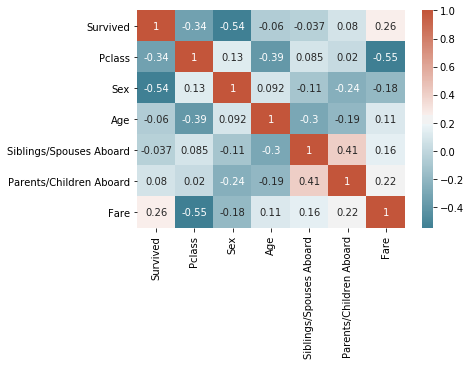

In [13]:
corr = data_cleaned.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

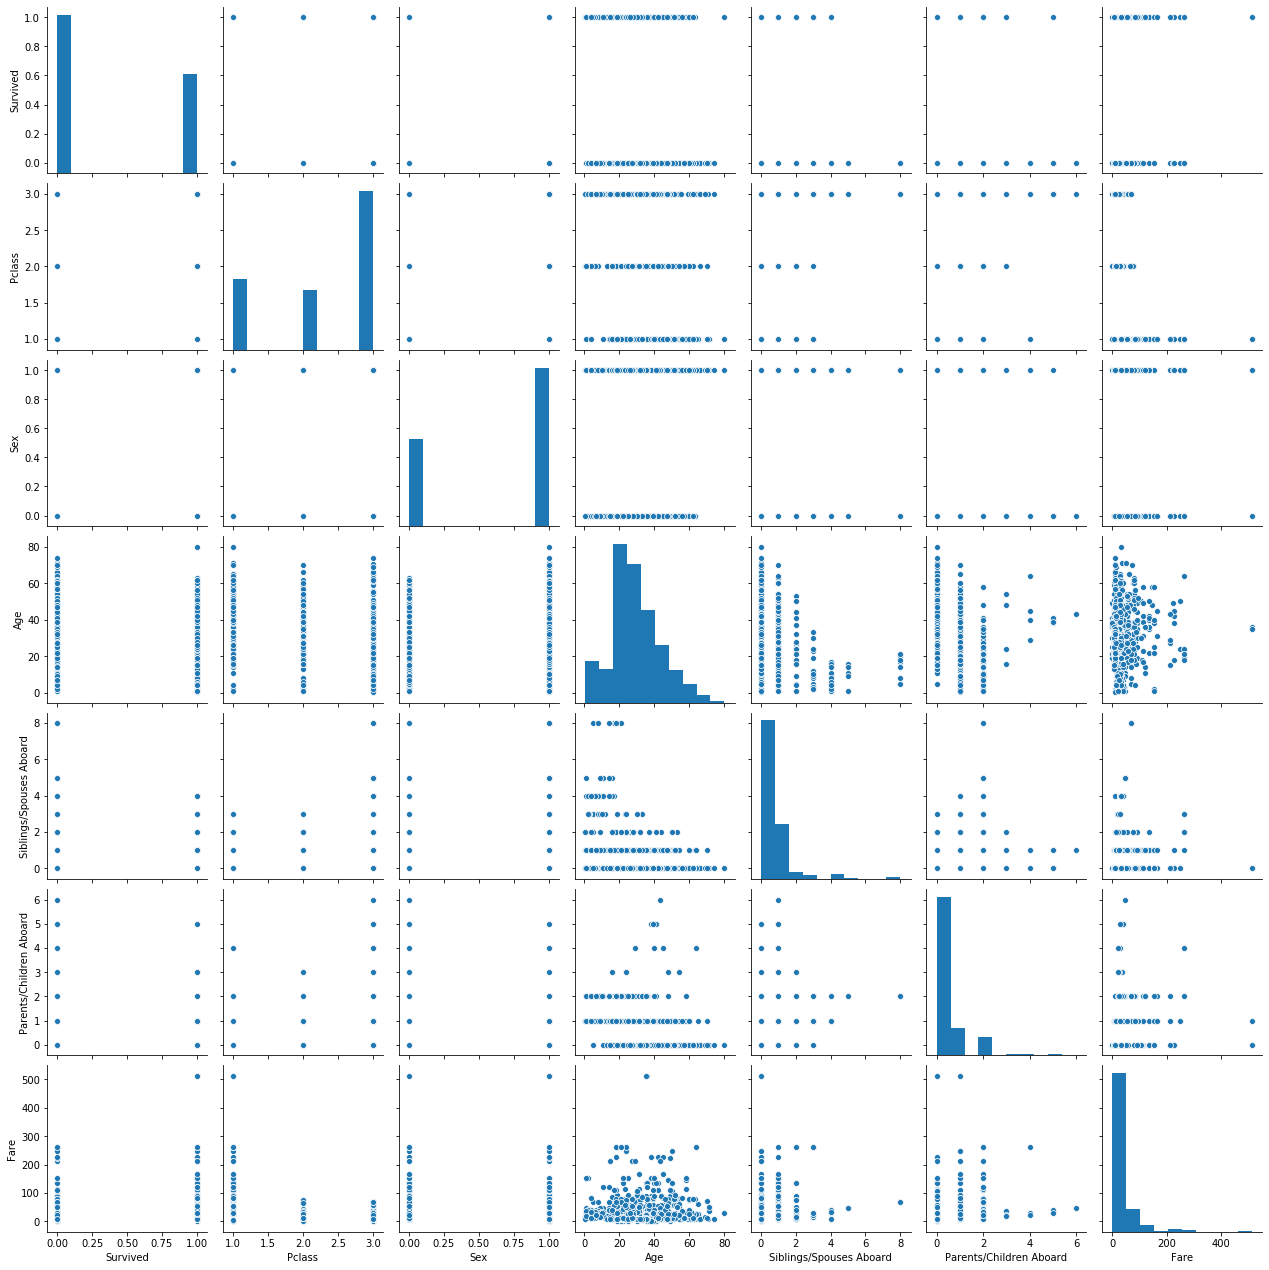

In [14]:
sns.pairplot(data_cleaned)

In [15]:
survivedList = ['yes' if Survived == 1 else 'no' for Survived in data_cleaned.iloc[:]['Survived'].values]

In [16]:
pclassList = []
for i in data_cleaned.iloc[:]['Pclass'].values:
    if i == 1:
        pclassList.append('first')
    elif i == 2:
        pclassList.append('second')
    else:
        pclassList.append('third')

In [17]:
fareList = []
for i in data_cleaned.iloc[:]['Fare'].values:
    if i <= 8:
        fareList.append('low')
    elif i > 8 and i <=15 :
        fareList.append('medium')
    else:
        fareList.append('high')

In [18]:
genderList = ['male' if gender == 1 else 'female' for gender in data_cleaned.iloc[:]['Sex'].values]

In [19]:
ageList = ['child' if (1 < Age and Age <= 18) else 'adult' for Age in data_cleaned.iloc[:]['Age'].values]

In [20]:
data.rename(columns = {'Siblings/Spouses Aboard' : 'SiblingsSpousesAboard' }, inplace = True)
ssList = ['ssayes' if SiblingsSpousesAboard == 1 else 'ssano' for SiblingsSpousesAboard in data.iloc[:]['SiblingsSpousesAboard'].values]

In [21]:
data.rename(columns = {'Parents/Children Aboard' : 'ParentsChildrenAboard' }, inplace = True)
pList = ['pcano' if ParentsChildrenAboard == 0 else 'pcayes' for ParentsChildrenAboard in data.iloc[:]['ParentsChildrenAboard'].values]

In [22]:
processed_data = pd.DataFrame()

In [23]:
processed_data['pclass'] = pclassList
processed_data['sex'] = genderList
processed_data['age'] = ageList
processed_data['ssa'] = ssList
processed_data['pca'] = pList
processed_data['fare'] = fareList
processed_data['survived'] = survivedList

processed_data.to_csv('processed_titanic.csv',index=False)

In [24]:
processed_data

,pclass,sex,age,ssa,pca,fare,survived
0,third,male,adult,ssayes,pcano,low,no
1,first,female,adult,ssayes,pcano,high,yes
2,third,female,adult,ssano,pcano,low,yes
3,first,female,adult,ssayes,pcano,high,yes
4,third,male,adult,ssano,pcano,medium,no
...,...,...,...,...,...,...,...
882,second,male,adult,ssano,pcano,medium,no
883,first,female,adult,ssano,pcano,high,yes
884,third,female,child,ssayes,pcayes,high,no
885,first,male,adult,ssano,pcano,high,yes


In [25]:
from sklearn.model_selection import train_test_split
features = list(processed_data.columns)
features.pop()
X = processed_data[features]
y = processed_data['survived']

In [26]:
def findS(c,t):
    for i,val in enumerate(t):
        if val == 'yes':
            specific_hypothesis = c[i].copy()
            break
    for i,val in enumerate(c):
        if t[i] == 'yes':
            for x in range(len(specific_hypothesis)):
                if val[x] != specific_hypothesis[x]:
                    specific_hypothesis[x] = '?'
    return specific_hypothesis

In [29]:
def check(instance_attr_val, constraint):
    if (constraint == '-'):
        return False
    elif ((constraint != '?') and (constraint != instance_attr_val)):
        return False
    return True

def test(X_test,y_test,hypothesis):
    n = X_test.shape[0]
    m = X_test.shape[1]
    test_passed_cnt = 0
    for i in range(n):
        for j in range(m):
            instance_attr_val = X_test[i][j]
            constraint = hypothesis[j]
            if(check(instance_attr_val, constraint) == False):
                isSatisfying = 'no'
                break
            else:
                isSatisfying = 'yes'
        if y_test[i] == isSatisfying:
            test_passed_cnt += 1
    accuracy = (test_passed_cnt/n)*100
    return accuracy

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.98,random_state = 581)
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
X_test_array = np.array(X_test)
y_test_array = np.array(y_test)

sph = findS(X_train_array,y_train_array)

print("The Specific Hypothesis")
for i in features:
    print(i, end="\t")
print()
for i in sph:
    print(i, end="\t")

The Specific Hypothesis
pclass	sex	age	ssa	pca	fare	
?	female	?	?	?	?	

In [32]:
print("Accuracy is {}".format(test(X_test_array,y_test_array,sph)))

Accuracy is 78.62068965517241


In [ ]:
# 98-581 97-666 94-113 96-543